In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pyspark
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('Dataframe').getOrCreate()

In [3]:
spark

In [4]:
## read the dataset
df=spark.read.csv('/content/pubg.csv',header=True,inferSchema=True)
df.show()
# inferSchema=True, If false every data will be considered as string

+--------------+--------------+--------------+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+
|            Id|       groupId|       matchId|assists|boosts|damageDealt|DBNOs|headshotKills|heals|killPlace|killPoints|kills|killStreaks|longestKill|matchDuration|matchType|maxPlace|numGroups|rankPoints|revives|rideDistance|roadKills|swimDistance|teamKills|vehicleDestroys|walkDistance|weaponsAcquired|winPoints|winPlacePerc|
+--------------+--------------+--------------+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+
|7f96b2f878858a|4d4

In [5]:
### Check the schema
df.printSchema() #Like df.info()

root
 |-- Id: string (nullable = true)
 |-- groupId: string (nullable = true)
 |-- matchId: string (nullable = true)
 |-- assists: integer (nullable = true)
 |-- boosts: integer (nullable = true)
 |-- damageDealt: double (nullable = true)
 |-- DBNOs: integer (nullable = true)
 |-- headshotKills: integer (nullable = true)
 |-- heals: integer (nullable = true)
 |-- killPlace: integer (nullable = true)
 |-- killPoints: integer (nullable = true)
 |-- kills: integer (nullable = true)
 |-- killStreaks: integer (nullable = true)
 |-- longestKill: double (nullable = true)
 |-- matchDuration: integer (nullable = true)
 |-- matchType: string (nullable = true)
 |-- maxPlace: integer (nullable = true)
 |-- numGroups: integer (nullable = true)
 |-- rankPoints: integer (nullable = true)
 |-- revives: integer (nullable = true)
 |-- rideDistance: double (nullable = true)
 |-- roadKills: integer (nullable = true)
 |-- swimDistance: double (nullable = true)
 |-- teamKills: integer (nullable = true)
 |--

In [6]:
type(df)

pyspark.sql.dataframe.DataFrame

In [7]:
df.head(5)

[Row(Id='7f96b2f878858a', groupId='4d4b580de459be', matchId='a10357fd1a4a91', assists=0, boosts=0, damageDealt=0.0, DBNOs=0, headshotKills=0, heals=0, killPlace=60, killPoints=1241, kills=0, killStreaks=0, longestKill=0.0, matchDuration=1306, matchType='squad-fpp', maxPlace=28, numGroups=26, rankPoints=-1, revives=0, rideDistance=0.0, roadKills=0, swimDistance=0.0, teamKills=0, vehicleDestroys=0, walkDistance=244.8, weaponsAcquired=1, winPoints=1466, winPlacePerc=0.4444),
 Row(Id='eef90569b9d03c', groupId='684d5656442f9e', matchId='aeb375fc57110c', assists=0, boosts=0, damageDealt=91.47, DBNOs=0, headshotKills=0, heals=0, killPlace=57, killPoints=0, kills=0, killStreaks=0, longestKill=0.0, matchDuration=1777, matchType='squad-fpp', maxPlace=26, numGroups=25, rankPoints=1484, revives=0, rideDistance=0.0045, roadKills=0, swimDistance=11.04, teamKills=0, vehicleDestroys=0, walkDistance=1434.0, weaponsAcquired=5, winPoints=0, winPlacePerc=0.64),
 Row(Id='1eaf90ac73de72', groupId='6a4a42c32

In [8]:
df.describe().show()

+-------+--------------+--------------+--------------+-------------------+------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+---------+------------------+-----------------+-----------------+------------------+------------------+--------------------+------------------+-------------------+--------------------+------------------+------------------+-----------------+-------------------+
|summary|            Id|       groupId|       matchId|            assists|            boosts|      damageDealt|             DBNOs|      headshotKills|             heals|         killPlace|        killPoints|             kills|       killStreaks|       longestKill|     matchDuration|matchType|          maxPlace|        numGroups|       rankPoints|           revives|      rideDistance|           roadKills|      swimDistance|          teamKills|     vehic

# **Exploratory Data** **Analysis**

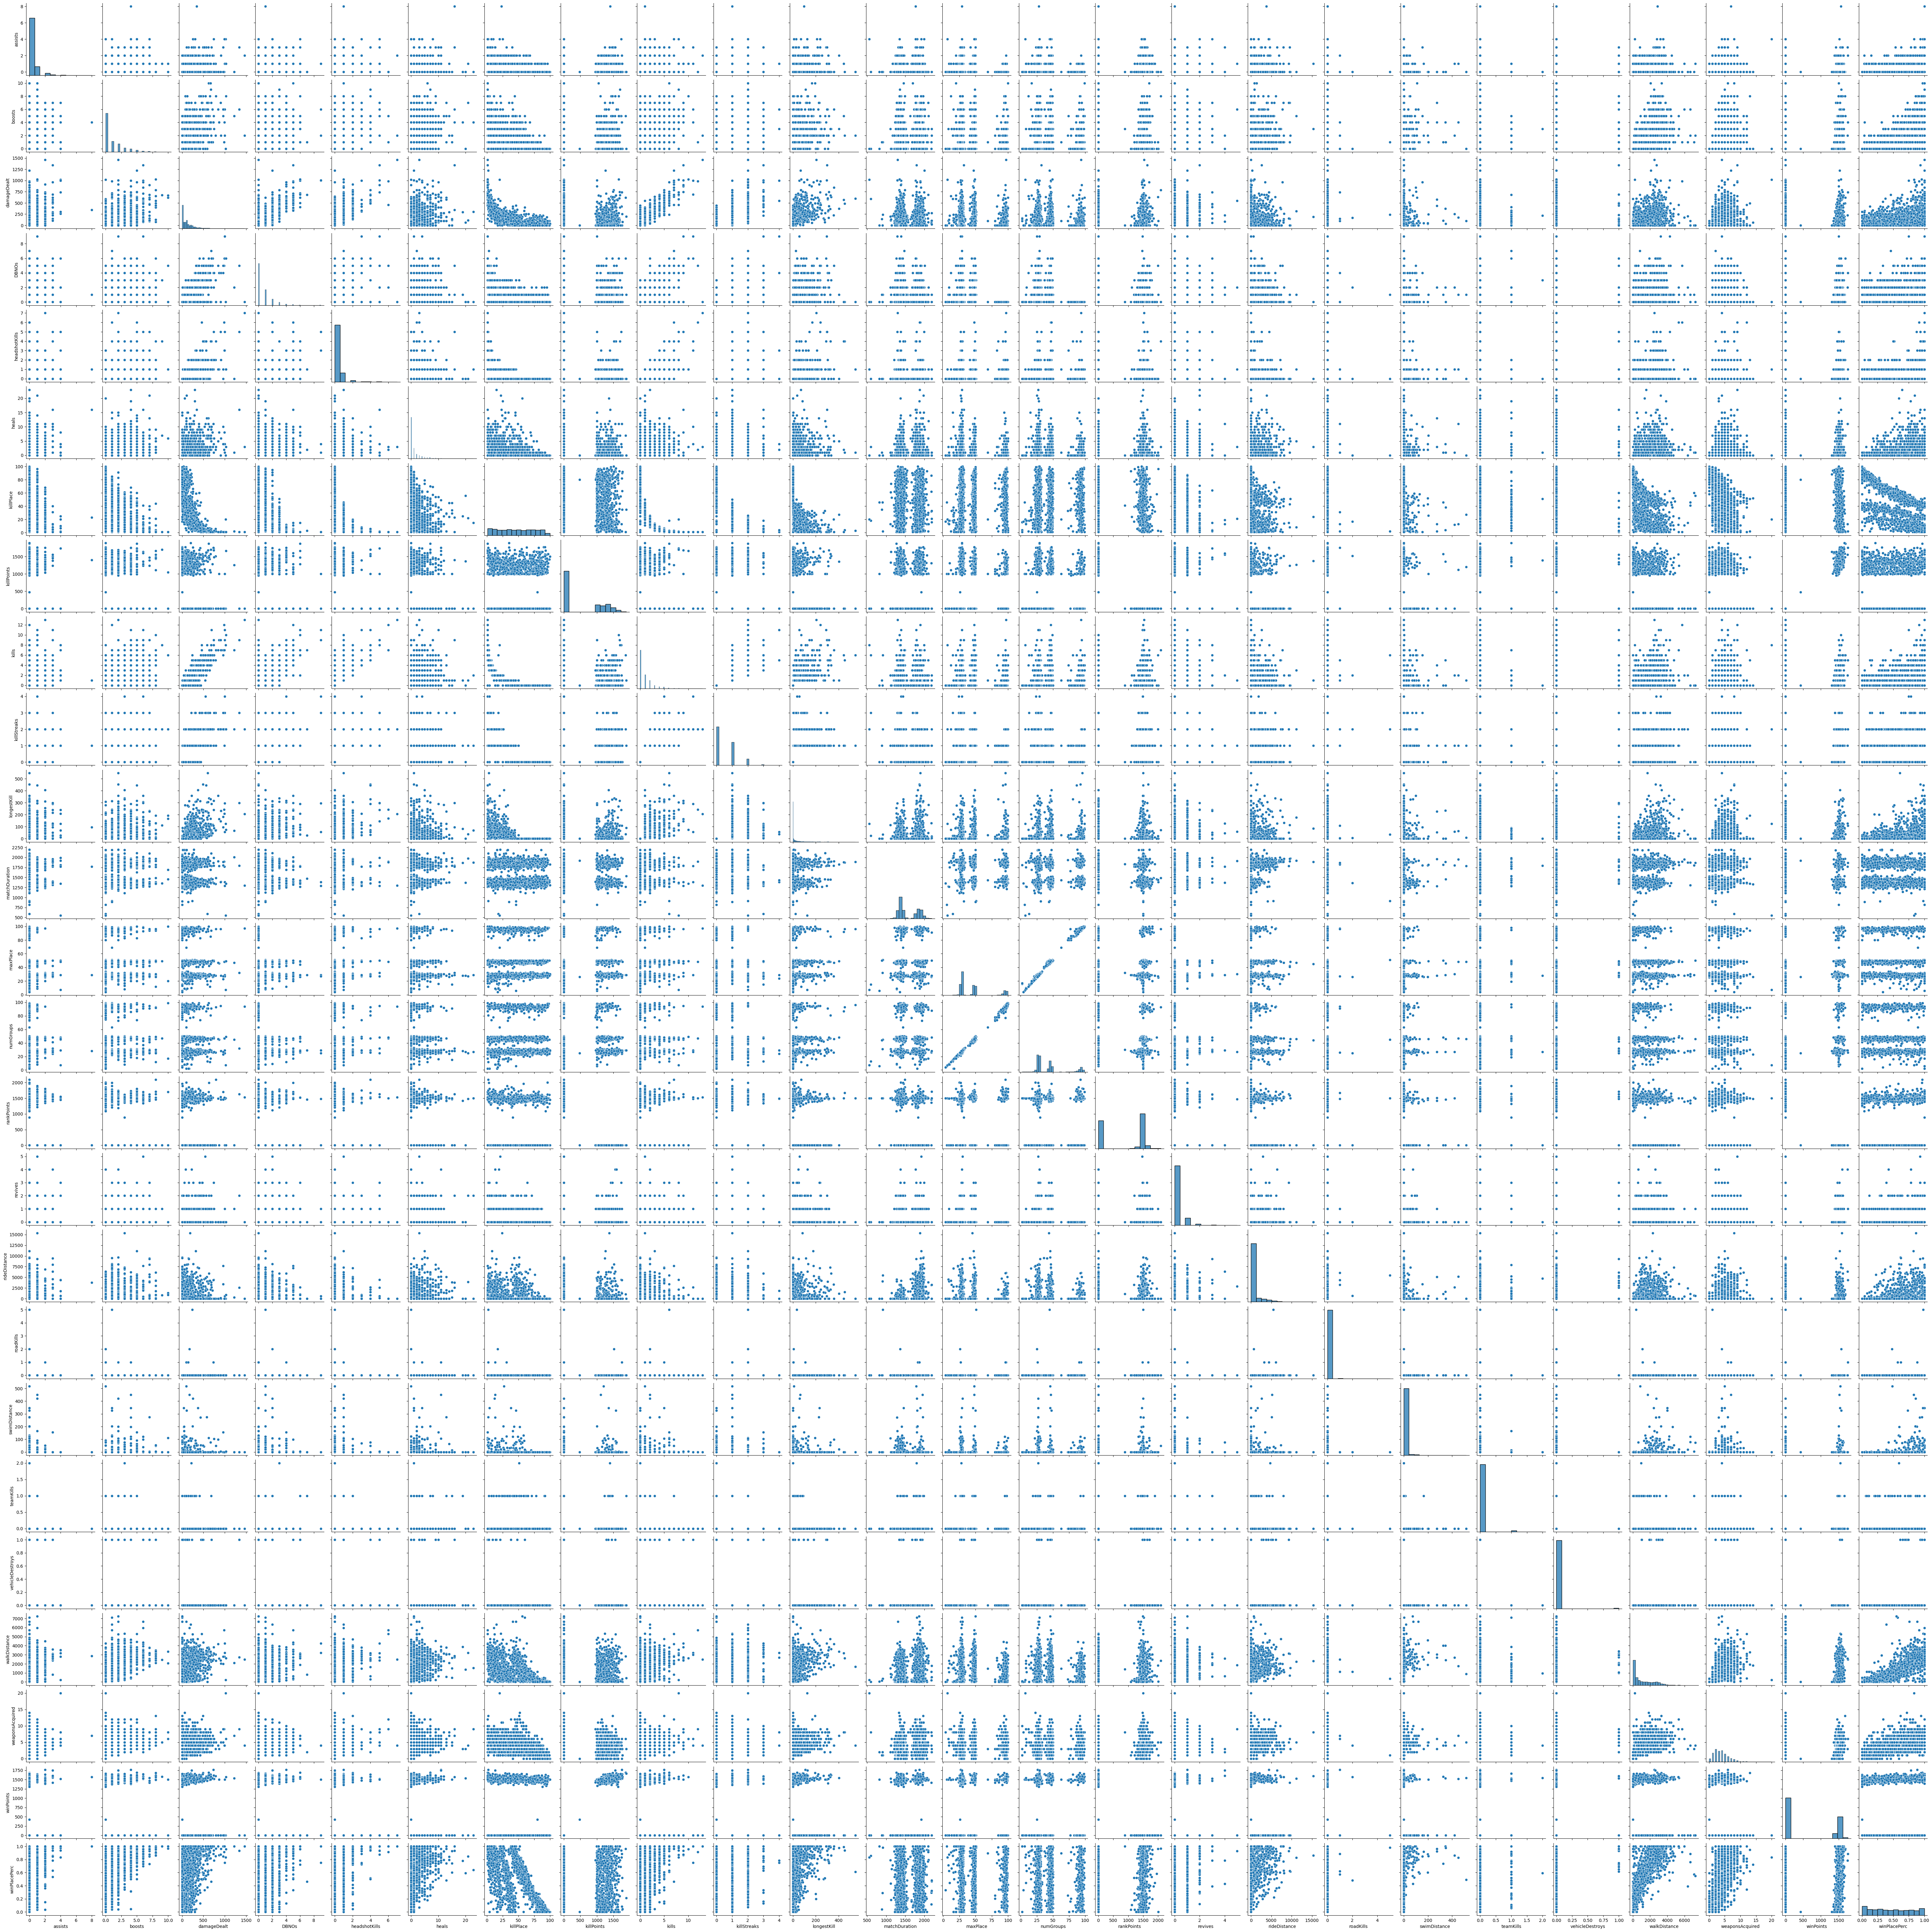

In [9]:
# Sample the data
# Example: % sample, without replacement
fraction = 0.01
sampled_data = df.sample(withReplacement=False, fraction=fraction, seed=42)

# Convert to Pandas DataFrame
pandas_df = sampled_data.toPandas()

# Create the pairplot
sns.pairplot(pandas_df)
plt.show()

In [10]:
pandas_full = df.toPandas()

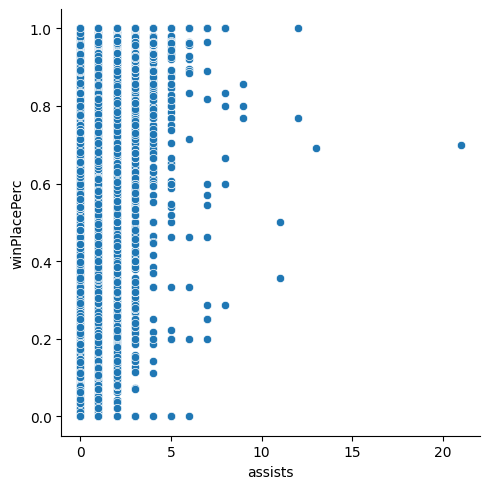

In [11]:
# Analyzing assists and winPlacePerc
sns.relplot(x='assists',y='winPlacePerc',data=pandas_full)
# assists are not showing much trend for the winPlacePerc.

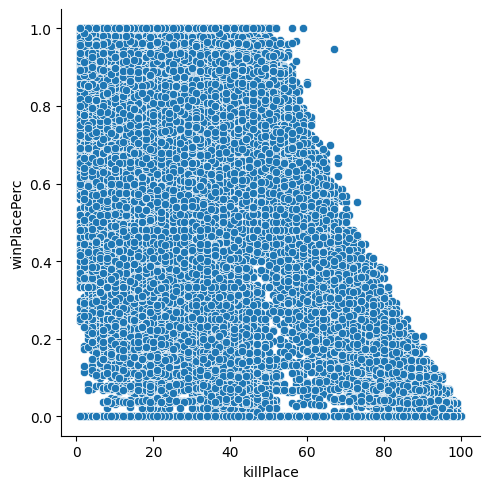

In [13]:
# Analyzing assists and winPlacePerc
sns.relplot(x='killPlace',y='winPlacePerc',data=pandas_full)
# killPlace are not showing much trend for the winPlacePerc.

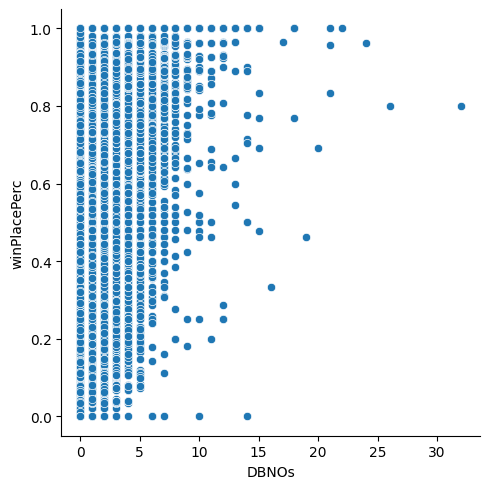

In [14]:
# Analyzing assists and winPlacePerc
sns.relplot(x='DBNOs',y='winPlacePerc',data=pandas_full)
# killPlace are showing trend for the winPlacePerc.

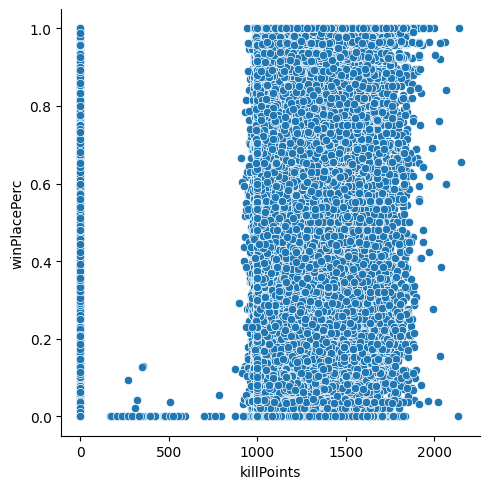

In [15]:
# Analyzing assists and winPlacePerc
sns.relplot(x='killPoints',y='winPlacePerc',data=pandas_full)
# killPoints are not showing much trend for the winPlacePerc

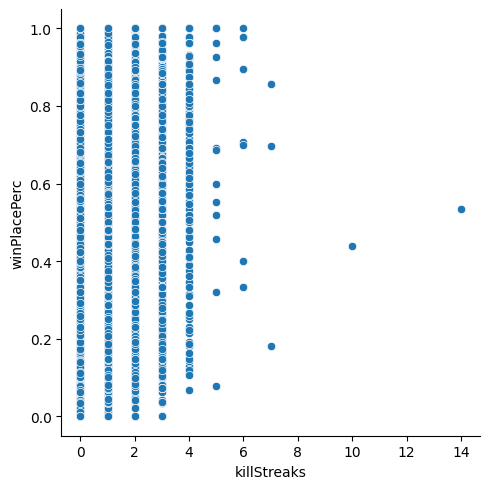

In [16]:
# Analyzing assists and winPlacePerc
sns.relplot(x='killStreaks',y='winPlacePerc',data=pandas_full)
# killStreaks are showing trend for the winPlacePerc

In [17]:
# Analyzing assists and winPlacePerc
sns.relplot(x='roadKills',y='winPlacePerc',data=pandas_full)
# roadKills are showing trend for the winPlacePerc

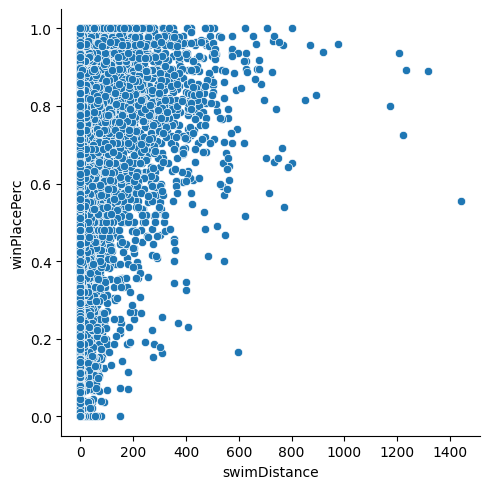

In [18]:
# Analyzing assists and winPlacePerc
sns.relplot(x='swimDistance',y='winPlacePerc',data=pandas_full)
# swimDistance are showing trend for the winPlacePerc

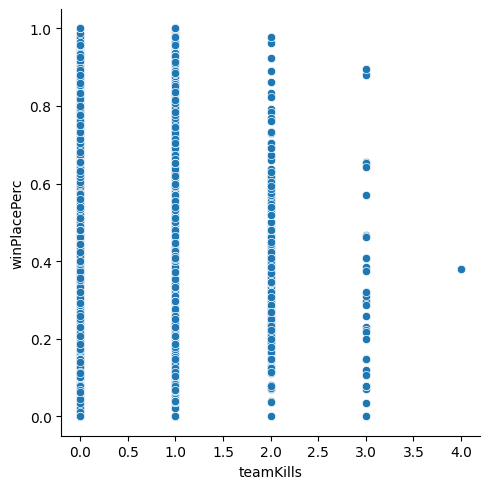

In [19]:
# Analyzing assists and winPlacePerc
sns.relplot(x='teamKills',y='winPlacePerc',data=pandas_full)
# teamKills are not showing trend for the winPlacePerc

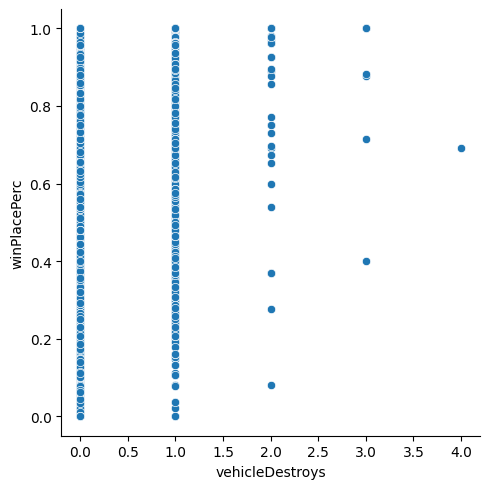

In [21]:
# Analyzing assists and winPlacePerc
sns.relplot(x='vehicleDestroys',y='winPlacePerc',data=pandas_full)
# vehicleDestroys are not showing trend for the winPlacePerc

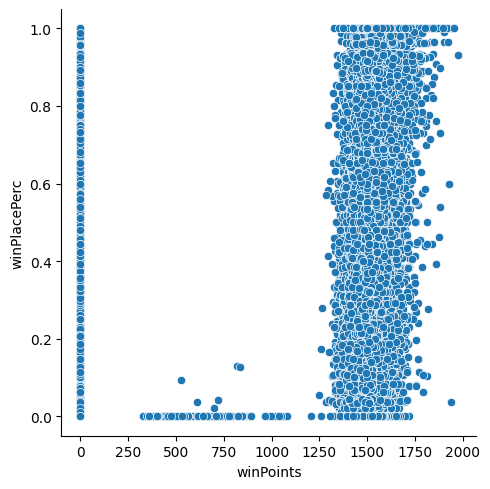

In [22]:
# Analyzing assists and winPlacePerc
sns.relplot(x='winPoints',y='winPlacePerc',data=pandas_full)
# winPoints are not showing trend for the winPlacePerc

# **Data Pre-processing**

# Handling Categorical Features

In [23]:
from pyspark.ml.feature import StringIndexer
indexer=StringIndexer(inputCol="matchType",outputCol="matchType_")
df=indexer.fit(df).transform(df)
df.show()

+--------------+--------------+--------------+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|            Id|       groupId|       matchId|assists|boosts|damageDealt|DBNOs|headshotKills|heals|killPlace|killPoints|kills|killStreaks|longestKill|matchDuration|matchType|maxPlace|numGroups|rankPoints|revives|rideDistance|roadKills|swimDistance|teamKills|vehicleDestroys|walkDistance|weaponsAcquired|winPoints|winPlacePerc|matchType_|
+--------------+--------------+--------------+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+-----------

In [24]:
df=df.drop('Id','groupId','matchId','matchType') #Dropping these 'Id','groupId','matchId' columns as they are not required for predection and match typeas we have indexed it with new column.

In [25]:
df.show() #All the categorical data has been handled.

+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|assists|boosts|damageDealt|DBNOs|headshotKills|heals|killPlace|killPoints|kills|killStreaks|longestKill|matchDuration|maxPlace|numGroups|rankPoints|revives|rideDistance|roadKills|swimDistance|teamKills|vehicleDestroys|walkDistance|weaponsAcquired|winPoints|winPlacePerc|matchType_|
+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|      0|     0|        0.0|    0|            0|    0|       60|      1241|    0|          0|        0.0|         1306|      28|       26|        -1|  

# **Check for missing values**

In [27]:
column_names = df.columns

# Print the list of column names
print(column_names)

['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc', 'matchType_']


In [34]:
from pyspark.sql.functions import count, when, col

# Get the column names from the DataFrame
columns_to_check = ['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc', 'matchType_']

null_counts = df.select([count(when(col(c).isNull(), c)).alias(c) for c in columns_to_check])

# Show the results
null_counts.show() #There are no null value.

+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|assists|boosts|damageDealt|DBNOs|headshotKills|heals|killPlace|killPoints|kills|killStreaks|longestKill|matchDuration|maxPlace|numGroups|rankPoints|revives|rideDistance|roadKills|swimDistance|teamKills|vehicleDestroys|walkDistance|weaponsAcquired|winPoints|winPlacePerc|matchType_|
+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|      0|     0|          0|    0|            0|    0|        0|         0|    0|          0|          0|            0|       0|        0|         0|  

In [35]:
spark.stop()